In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [9]:
columns_name = [
    'timestamp','sex','matric_gpa_%' ,'study_year','faculty','gpa_%_2023','accommodation_status',
    'monthly_allowance','scholarship','study_hours_week','socialising_week','drinks_night',
    'classes_missed','modules_failed','in_relationship','parental_approval','relationship_parents'
]

student_data = pd.read_csv("student_survey.csv", names = columns_name, header = 0)

In [10]:
student_data.head()

,timestamp,sex,matric_gpa_%,study_year,faculty,gpa_%_2023,accommodation_status,monthly_allowance,scholarship,study_hours_week,socialising_week,drinks_night,classes_missed,modules_failed,in_relationship,parental_approval,relationship_parents
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


## Exploratory Data Analysis (EDA)

* shape ( rows, columns )
* data types
* no. of missing values
* categorical value counts
* visualization
* correlation
* Outliers

In [11]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             406 non-null    object 
 1   sex                   404 non-null    object 
 2   matric_gpa_%          399 non-null    float64
 3   study_year            333 non-null    object 
 4   faculty               399 non-null    object 
 5   gpa_%_2023            320 non-null    float64
 6   accommodation_status  383 non-null    object 
 7   monthly_allowance     375 non-null    object 
 8   scholarship           398 non-null    object 
 9   study_hours_week      403 non-null    object 
 10  socialising_week      404 non-null    object 
 11  drinks_night          404 non-null    object 
 12  classes_missed        403 non-null    object 
 13  modules_failed        403 non-null    object 
 14  in_relationship       403 non-null    object 
 15  parental_approval     4

In [13]:
student_data['sex'].value_counts(normalize=True)

sex
Male      0.534653
Female    0.465347
Name: proportion, dtype: float64

In this survery, there is 53% of male and 47% of female population.

In [14]:
table = pd.crosstab(student_data.parental_approval, student_data.relationship_parents)
table

relationship_parents,Close,Distant,Fair,Very close
parental_approval,,,,
No,18,1,9,20
Yes,79,1,25,248


<Axes: xlabel='relationship_parents'>

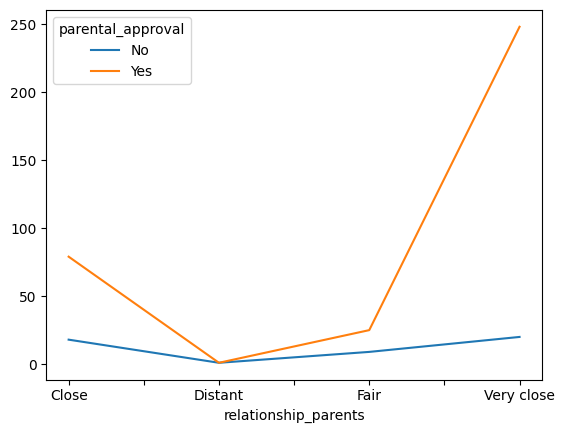

In [17]:
table.T.plot.line()

<< Write Decription >>

In [28]:
group_faculty = student_data.groupby(by='faculty')
information = group_faculty['matric_gpa_%'].aggregate(('min','max','mean'))
information

,min,max,mean
faculty,,,
AgriSciences,66.0,86.0,74.772727
Arts & Social Sciences,60.0,85.0,75.969565
Economic & Management Sciences,34.0,99.0,76.977095
Education,71.0,82.0,76.000000
Engineering,73.0,98.0,83.691667
Law,72.0,90.0,80.200000
Medicine and Health Services,73.0,85.0,79.888889
Science,65.0,92.0,80.294727


<Axes: xlabel='faculty'>

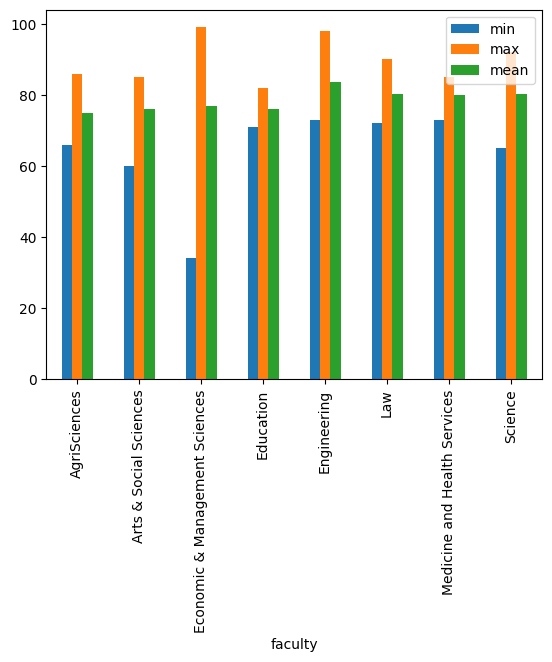

In [29]:
information.plot.bar()

<< write description>>

In [39]:
student_data.accommodation_status.value_counts()

accommodation_status
Private accommodation/ stay with family/friends    335
Non-private accommodation ie. Res                   48
Name: count, dtype: int64

In [30]:
table = pd.crosstab(student_data.accommodation_status, student_data.socialising_week)
table

socialising_week,0,1,2,3,4+,Only weekends
accommodation_status,,,,,,
Non-private accommodation ie. Res,2,12,15,5,3,11
Private accommodation/ stay with family/friends,14,89,70,52,13,97


<Axes: xlabel='socialising_week', ylabel='accommodation_status'>

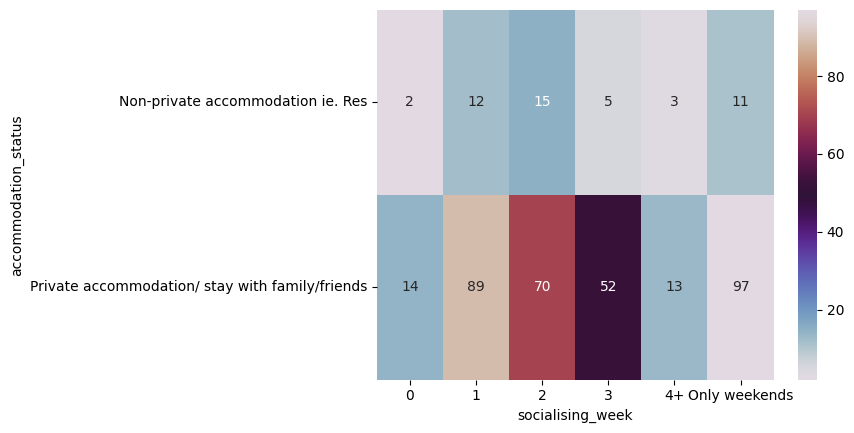

In [38]:
sns.heatmap(table, annot=True, cmap = "twilight")

* During weekends, **students stating with their friends and family are 9 time more likely** to party compared to hostelers.
* In an avergre, privately housed student party more than 7 times than student living in college.

In [43]:
score, p_val, _, _ = stats.chi2_contingency(table)
print(score)
print(p_val)

3.9099046455825284
0.5624591514521107


<< Write Description >>

**Influence of Gender on GPA**

In [47]:
student_data.groupby("sex")['gpa_%_2023'].agg(('min','max','mean','std', 'median'))

,min,max,mean,std,median
sex,,,,,
Female,50.0,95.22,67.596067,8.834404,67.0
Male,30.0,92.00,65.097059,9.284666,64.0


<Axes: xlabel='gpa_%_2023', ylabel='sex'>

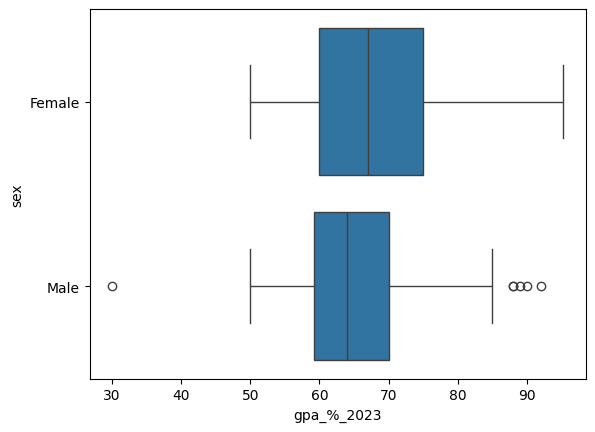

In [46]:
sns.boxplot(x='gpa_%_2023',y='sex', data=student_data)

<< Write Desciption >>

In [51]:
student_data.scholarship.value_counts()

scholarship
No                     352
Yes (NSFAS, etc...)     46
Name: count, dtype: int64

In [52]:
student_data.modules_failed.value_counts()

modules_failed
0     263
1      58
2      31
4+     27
3      24
Name: count, dtype: int64

In [55]:
table = pd.crosstab(student_data.scholarship, student_data.modules_failed)
table

modules_failed,0,1,2,3,4+
scholarship,,,,,
No,230,49,29,20,23
"Yes (NSFAS, etc...)",27,9,2,4,4


<< Write Description >>

<Axes: xlabel='matric_gpa_%', ylabel='gpa_%_2023'>

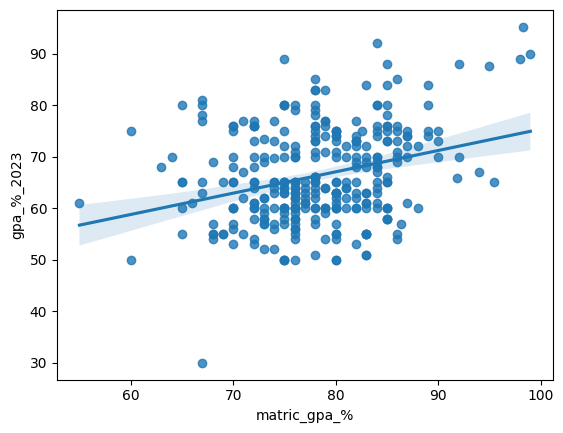

In [60]:
# student_data.plot.scatter("matric_gpa_%","gpa_%_2023")
sns.regplot(x="matric_gpa_%",y="gpa_%_2023", data = student_data)

In [61]:
student_data[["matric_gpa_%","gpa_%_2023"]].corr()

,matric_gpa_%,gpa_%_2023
matric_gpa_%,1.000000,0.299104
gpa_%_2023,0.299104,1.000000


<< write description >>

In [63]:
student_data.isna().sum()

timestamp                0
sex                      2
matric_gpa_%             7
study_year              73
faculty                  7
gpa_%_2023              86
accommodation_status    23
monthly_allowance       31
scholarship              8
study_hours_week         3
socialising_week         2
drinks_night             2
classes_missed           3
modules_failed           3
in_relationship          3
parental_approval        4
relationship_parents     3
dtype: int64